In [1]:
import matplotlib.pyplot as plt

import repackage
repackage.up()

from data_analys.data_generator import guillotine_cutting, guillotine_cutting_max
from data_analys.draw_utils import draw_cutting, draw_items_cnt, draw_side_bar
from concat_baseline import Rectangle, pallet_placement, assign_coordinates, rects_flatten

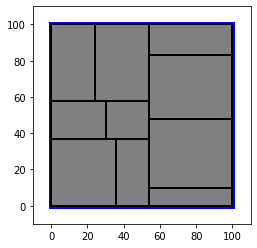

In [2]:
H, W = 100, 100
n_rect = 10
min_side = 5
seed = 0

items_xywh = guillotine_cutting_max(W, H, n_rect, min_side, seed)

fig, ax = plt.subplots()
draw_cutting(H, W, items_xywh, ax=ax)

In [3]:
items_wh = [
    (w, h) if w > h else (h, w)
    for x,y,w,h in items_xywh
]

In [4]:
rects = [Rectangle(w, h)
         for w, h in items_wh
        ]

In [5]:
pallet = Rectangle(W, H,[],(W, H))
rest_rects = pallet_placement(pallet, rects)

assert len(rest_rects) + len(rects_flatten(pallet.placed)) == len(rects)

In [6]:
#pallet.placed

In [7]:
# print('free_wh:')
# pallet.free_print()

In [8]:
solve_xywh = assign_coordinates(0, 0, pallet.w, pallet.h, pallet.placed)

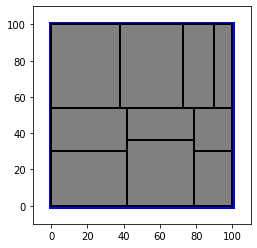

In [9]:
fig, ax = plt.subplots()
draw_cutting(pallet.w, pallet.h, solve_xywh, ax=ax)

In [10]:
pallet

Rectangle(w=100, h=100, childs=1, free_wh=(0, 0), fullness=100.0%)